#**Лабораторная работа по ММАД №2**

##**Выполнил: Степанищев Степан Владимирович, гр. 23171**


##***Задание 1***

###Скачиваем таблицу mashroom с kaggle https://www.kaggle.com/datasets/uciml/mushroom-classification/

---

###Подключаем библиотеки

---


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import BernoulliNB

###Загружаем таблицу mashrooms как pandas.DataFrame

---


In [14]:
mushrooms = pd.read_csv('/content/mushrooms.csv')


###Отделяем признаки, соответствующие моему варианту (7)

---

####Test size определяет процент данных, которые идут на тестовую выборку

In [28]:
myFeatures = ['gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring']
X = mushrooms.loc[:, myFeatures]
Y = mushrooms.iloc[:, 0]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = None)

###Вычислим распределения признаков по классам и визуализируем их

---

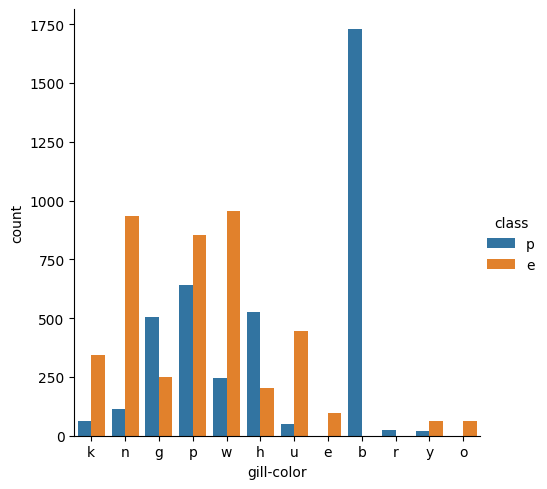

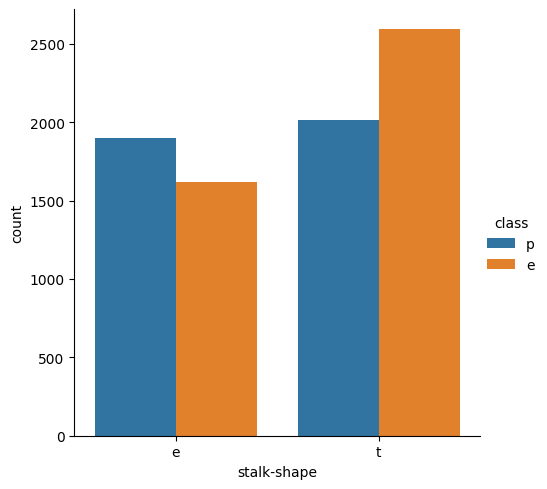

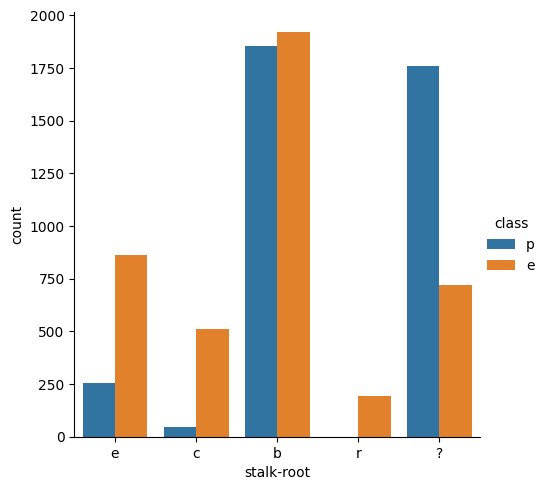

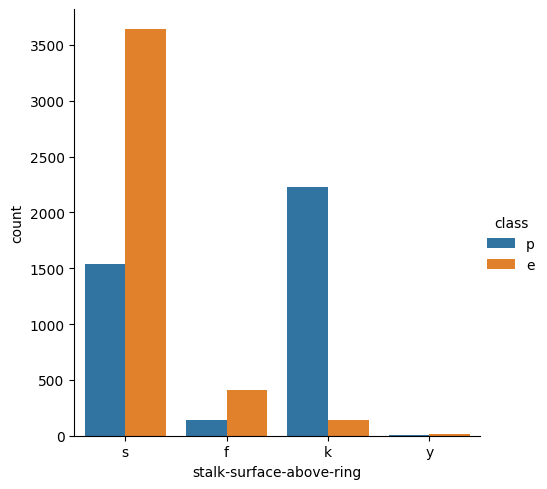

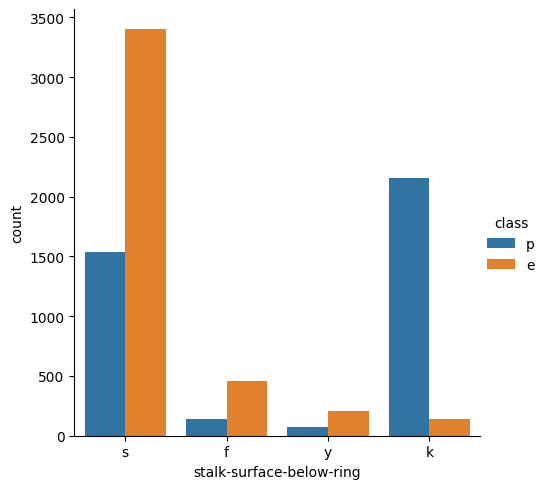

In [26]:
for i in myFeatures:
  sns.catplot(data=pd.concat([X, Y], axis=1) , x=i, kind='count', hue='class')

##***Задание 2***

###Находим частоты по всем переменным

---

In [34]:
tmp = []
for feat in myFeatures:
  tmp.append(pd.concat([X_train[feat][Y_train == 'e'].value_counts() / X_train[feat].value_counts(),
 X_train[feat][Y_train == 'p'].value_counts() / X_train[feat].value_counts()], axis = 1, keys = ['freq on e', 'freq on p']).fillna(0))

freqs = pd.concat(tmp, keys = myFeatures)
freqs['target'] = freqs['freq on e'].map(lambda x: 'e' if x >= 0.5 else 'p')
freqs


freq on e  freq on p target
gill-color               b   0.000000   1.000000      p
                         e   1.000000   0.000000      e
                         g   0.325670   0.674330      p
                         h   0.269307   0.730693      p
                         k   0.825623   0.174377      e
                         n   0.899329   0.100671      e
                         o   1.000000   0.000000      e
                         p   0.563790   0.436210      e
                         r   0.000000   1.000000      p
                         u   0.905172   0.094828      e
                         w   0.793689   0.206311      e
                         y   0.733333   0.266667      e
stalk-shape              t   0.558277   0.441723      e
                         e   0.458537   0.541463      p
stalk-root               ?   0.288773   0.711227      p
                         b   0.506205   0.493795      e
                         c   0.925065   0.074935      e
                         e   0.758127   0.241873      e
                         r   1.000000   0.000000      e
stalk-surface-above-ring f   0.721485   0.278515      e
                         k   0.059358   0.940642      p
                         s   0.699725   0.300275      e
                         y   0.666667   0.333333      e
stalk-surface-below-ring f   0.743468   0.256532      e
                         k   0.063442   0.936558      p
                         s   0.679919   0.320081      e
                         y   0.767327   0.232673      e

###Строим решающие функции по частотам

---

In [42]:
X_tmp = X_test.copy()

for feat in myFeatures:
 X_tmp['target on ' + feat] = X_tmp[feat].map(lambda x: freqs['target'][feat, x])
display(X_tmp.iloc[:, 5:])

for feat in myFeatures:
 print('Accuracy on \'{}\' is {:.5} on test set.'.format(feat, accuracy_score(Y_test, X_tmp['target on ' + feat])))

print('\n\n')

X_tmp = X_train.copy()

for feat in myFeatures:
 X_tmp['target on ' + feat] = X_tmp[feat].map(lambda x: freqs['target'][feat, x])

for feat in myFeatures:
 print('Accuracy on \'{}\' is {:.5} on train set.'.format(feat, accuracy_score(Y_train, X_tmp['target on ' + feat])))

,target on gill-color,target on stalk-shape,target on stalk-root,target on stalk-surface-above-ring,target on stalk-surface-below-ring
2093,p,e,e,e,e
983,e,e,e,e,e
674,e,p,e,e,e
5539,e,e,e,e,e
4446,p,p,e,p,p
...,...,...,...,...,...
5251,e,e,e,e,e
57,e,p,e,e,e
6522,p,e,p,p,e
2402,e,e,e,e,e


Accuracy on 'gill-color' is 0.80722 on test set.
Accuracy on 'stalk-shape' is 0.55742 on test set.
Accuracy on 'stalk-root' is 0.65176 on test set.
Accuracy on 'stalk-surface-above-ring' is 0.78261 on test set.
Accuracy on 'stalk-surface-below-ring' is 0.78138 on test set.



Accuracy on 'gill-color' is 0.80408 on train set.
Accuracy on 'stalk-shape' is 0.551 on train set.
Accuracy on 'stalk-root' is 0.64351 on train set.
Accuracy on 'stalk-surface-above-ring' is 0.77102 on train set.
Accuracy on 'stalk-surface-below-ring' is 0.75958 on train set.


**Вывод:** Точности на тестовой и тренировочной выборках совпадают. Самыми неинформативными признаками оказались stalk-shape и stalk-root. В целом они все оказались не очень информативными, кроме, разве что gill-color.

##***Задание 3***

###Преобразуем данные в числа

---

In [52]:
encoded_X_train = pd.get_dummies(X_train)
encoded_X_test = pd.get_dummies(X_test)

# align data
encoded_X_train, encoded_X_test = encoded_X_train.align(encoded_X_test, join = 'left', axis = 1)

###Строим наивный Байесовский классификатор и оцениваем точность

---

In [45]:
classifier = BernoulliNB(alpha = 1, binarize = None).fit(encoded_X_train, Y_train)
Y_test_target = classifier.predict(encoded_X_test)

print('Accuracy is {:.5} on test set.'.format(accuracy_score(Y_test, Y_test_target)))

Accuracy is 0.87941 on test set.


**Вывод:** Получилось лучше, чем классификация с помощью решающей функции, построенной по частотам

##***Задание 4***

###Строим свой классификатор

---

In [56]:
def naive_bayes(X_train, Y_train, X_test, alpha = 1):
 p_num = (Y_train == 'p').sum()
 e_num = (Y_train == 'e').sum()

 p_prob = (Y_train =='p').mean()
 e_prob = 1 - p_prob

 P = (X_train[Y_train == 'p'].sum().to_numpy() + alpha) / (p_num + 2 * alpha)
 E = (X_train[Y_train == 'e'].sum().to_numpy() + alpha) / (e_num + 2 * alpha)

 index = X_train.columns
 B = np.log((P * (1 - E)) / (E * (1 - P)))

 b_0 = np.log((1 - P) / (1 - E)).sum() + np.log(p_prob / e_prob)

 mapping = {1: None, -1: None}
 if Y_train.iloc[0] == 'e':
  temp = np.sign(X_train.iloc[0].to_numpy().dot(B) + b_0)
  mapping[temp] = 'e'
  mapping[-1 * temp] = 'p'
 else:
  temp = np.sign(X_train.iloc[0].to_numpy().dot(B) + b_0)
  mapping[temp] = 'p'
  mapping[-1 * temp] = 'e'
 return np.array([mapping[i] for i in np.sign(X_test.to_numpy().dot(B) + b_0)])

###Пробуем его на прочность

---

In [60]:
Y_test_target = naive_bayes(encoded_X_train, Y_train, encoded_X_test)
print('Accuracy score is {:.5} on test set.'.format(accuracy_score(Y_test, Y_test_target)))

Accuracy score is 0.87941 on test set.


**Вывод:** точность совпала с библиотечной функцией. Можно попробовать поменять регуляризатор, но на результат это не влияет.